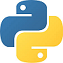
# Linked Lists #

### Examples by Codecademy + Commentary and Exercise by N. Day - September 2022 ###

## This section introduces Nodes and Linked Lists. It contains interactive code (there may be some errors for you to repair) and (possibly) a multiple choice quiz. At the end there is also <font color="red">a logbook exercise for you to complete</font>  ##


![LinkedLists.png](https://media.geeksforgeeks.org/wp-content/cdn-uploads/gq/2013/03/Linkedlist.png)



# Nodes and Linked Lists #

A linked list is different to the indexed lists we've seen before. ArrayList, List and Array store values at numbered positions (indexes). But a linked list is not indexed. We cannot directly access a value stored at position 7 in a linked list. Instead, we have to iterate through the nodes 

So what are nodes? 
- The term node comes from networking: a node in a network.
- Here, a node is a class that 'wraps' around one or two values. 
- In a linked list, a node has to store the reference to the next node in the list.
- We'll also utilise nodes in trees and graphs later in the module too.


# Node class #

In [1]:
class Node:
  def __init__(self, value, next_node=None):
    self.value = value
    self.next_node = next_node
    
  def get_value(self):
    return self.value
  
  def get_next_node(self):
    return self.next_node
  
  def set_next_node(self, next_node):
    self.next_node = next_node
    
my_node = Node(44)
print(my_node.get_value())

44


# Further on Node class

In [2]:
## Codeacademy

class Node:
  def __init__(self, value, link_node=None):
    self.value = value
    self.link_node = link_node
    
  def set_link_node(self, link_node):
    self.link_node = link_node
    
  def get_link_node(self):
    return self.link_node
  
  def get_value(self):
    return self.value

# Add your code below:
yacko = Node("likes to yak")
wacko = Node("has a penchant for hoarding snacks")
dot = Node("enjoys spending time in movie lots")

dot.set_link_node(wacko)
yacko.set_link_node(dot)

dots_data = yacko.get_link_node().get_value()
wackos_data = dot.get_link_node().get_value()

print(dots_data)
print(wackos_data)

enjoys spending time in movie lots
has a penchant for hoarding snacks


# (Singly) LinkedList Class - printing out the list

A singly linked list means that nodes only 'point' in one direction. Typically, one node points to the next node.
By contrast, a doubly linked list has a reference to the next node, and the previous node. 

Below, we add several nodes to an instance of the LinkedList class. Pay attention to the order in which the nodes are added/inserted.

![linkedtraversal](https://www.codesdope.com/staticroot/images/ds/link14.gif)

In [3]:
# We'll be using our Node class
class Node:
  def __init__(self, value, next_node=None):
    self.value = value
    self.next_node = next_node
    
  def get_value(self):
    return self.value
  
  def get_next_node(self):
    return self.next_node
  
  def set_next_node(self, next_node):
    self.next_node = next_node

# Our LinkedList class
class LinkedList:
  def __init__(self, value=None):
    self.head_node = Node(value)
  
  def get_head_node(self):
    return self.head_node
  
# Add your insert_beginning and stringify_list methods below:

  def insert_beginning(self, new_value):
    new_node = Node(new_value)
    new_node.set_next_node(self.head_node)
    self.head_node = new_node
    
  def stringify_list(self):
    string_list = ""
    current_node = self.get_head_node()
    while current_node:
      if current_node.get_value() != None:
        string_list += str(current_node.get_value()) + "\n"
      current_node = current_node.get_next_node()
    return string_list
  

# Test your code by uncommenting the statements below - did your list print to the terminal?
ll = LinkedList(5)
ll.insert_beginning(70)
ll.insert_beginning(5675)
ll.insert_beginning(90)
print(ll.stringify_list())

90
5675
70
5



# Removing a node from a linked list

Remember that a linked list is not an indexed structure. So we first have to iterate to find the item we want to remove. Iteration is linear time. But once we have located the node to be removed, we can change the 'pointer'. Rather than the pointing to the node to be removed, we can instead point to the next node after the one to be removed.

 x - > R -> y  
   x ->       y

With indexed structures, we could directly access a value within the structure (constant time access). BUT, we would then have to shift the remaining items, if we did not want empty locations within our list.

In [4]:
## Codeacademy 

 # We'll be using our Node class
class Node:
  def __init__(self, value, next_node=None):
    self.value = value
    self.next_node = next_node
    
  def get_value(self):
    return self.value
  
  def get_next_node(self):
    return self.next_node
  
  def set_next_node(self, next_node):
    self.next_node = next_node

# Our LinkedList class
class LinkedList:
  def __init__(self, value=None):
    self.head_node = Node(value)
  
  def get_head_node(self):
    return self.head_node
  
  def insert_beginning(self, new_value):
    new_node = Node(new_value)
    new_node.set_next_node(self.head_node)
    self.head_node = new_node
    
  def stringify_list(self):
    string_list = ""
    current_node = self.get_head_node()
    while current_node:
      if current_node.get_value() != None:
        string_list += str(current_node.get_value()) + "\n"
      current_node = current_node.get_next_node()
    return string_list
  
  # Define your remove_node method below:
  def remove_node(self, value_to_remove):
    current_node = self.get_head_node()
    if current_node.get_value() == value_to_remove:
      self.head_node = current_node.get_next_node()
    else:
      while current_node:
        next_node = current_node.get_next_node()
        if next_node.get_value() == value_to_remove:
          current_node.set_next_node(next_node.get_next_node())
          current_node = None
        else:
          current_node = next_node

ll = LinkedList(5)
ll.insert_beginning(70)
ll.insert_beginning(5675)
ll.insert_beginning(90)
print(ll.stringify_list())
print("Now removing node 70:")
ll.remove_node(70)
print(ll.stringify_list())

90
5675
70
5

Now removing node 70:
90
5675
5



# Insert a node mid-list
- First find the location to insert (the node BEFORE) - which will point to NEW
- Second, make sure that the AFTER (which contains the rest of the list) will be pointed to by NEW's next.  BEFORE -> NEW -> AFTER 
- Then make the BEFORE -> next point to NEW  

![insertmid](https://assets.digitalocean.com/articles/alligator/js/linked-lists-implementation/linked-list-insert.gif)

# Doubly Linked List

As previously mentioned, a doubly linked list has a reference for the next node in the list, as well as the previous node. 

To implement this additional sequencing, we need to make the following amendments to our functions.

# Add to the tail
A Python DoublyLinkedList class can implement an .add_to_tail() instance method for adding new data to the tail of the list. .add_to_tail() takes a single new_value argument. It uses new_value to create a new Node which it adds to the tail of the list.

In [ ]:
def add_to_tail(self, new_value):
    new_tail = Node(new_value)
    current_tail = self.tail_node

    if current_tail != None:
      current_tail.set_next_node(new_tail)
      new_tail.set_prev_node(current_tail)

    self.tail_node = new_tail

    if self.head_node == None:
      self.head_node = new_tail

# Adding to the Head
A Python DoublyLinkedList class can implement an .add_to_head() instance method for adding new data to the head of the list. .add_to_head() takes a single new_value argument. It uses new_value to create a new Node which it adds to the head of the list.

In [ ]:
def add_to_head(self, new_value):
    new_head = Node(new_value)
    current_head = self.head_node

    if current_head != None:
      current_head.set_prev_node(new_head)
      new_head.set_next_node(current_head)

    self.head_node = new_head

    if self.tail_node == None:
      self.tail_node = new_head

# Removing the Tail
A Python DoublyLinkedList class can implement a .remove_tail() instance method for removing the head of the list. .remove_tail() takes no arguments. It removes and returns the tail of the list, and sets the tail’s previous node as the new tail.

In [ ]:
def remove_tail(self):
    removed_tail = self.tail_node

    if removed_tail == None:
      return None

    self.tail_node = removed_tail.get_prev_node()

    if self.tail_node != None:
      self.tail_node.set_next_node(None)

    if removed_tail == self.head_node:
      self.remove_head()

    return removed_tail.get_value()


# Removing the Head

A Python DoublyLinkedList class can implement a .remove_head() instance method for removing the head of the list. .remove_head() takes no arguments. It removes and returns the head of the list, and sets the head’s next node as the new head.

In [ ]:
def remove_head(self):
    removed_head = self.head_node

    if removed_head == None:
      return None

    self.head_node = removed_head.get_next_node()

    if self.head_node != None:
      self.head_node.set_prev_node(None)

    if removed_head == self.tail_node:
      self.remove_tail()

    return removed_head.get_value()

# Removing by Value
A Python DoublyLinkedList class can implement a .remove_by_value() instance method that takes value_to_remove as an argument and returns the node that matches value_to_remove, or None if no match exists. If the node exists, .remove_by_value() removes it from the list and correctly resets the pointers of its surrounding nodes.

In [ ]:
def remove_by_value(self, value_to_remove):
    node_to_remove = None
    current_node = self.head_node

    while current_node != None:
      if current_node.get_value() == value_to_remove:
        node_to_remove = current_node
        break

      current_node = current_node.get_next_node()

    if node_to_remove == None:
      return None

    if node_to_remove == self.head_node:
      self.remove_head()
    elif node_to_remove == self.tail_node:
      self.remove_tail()
    else:
      next_node = node_to_remove.get_next_node()
      prev_node = node_to_remove.get_prev_node()
      next_node.set_prev_node(prev_node)
      prev_node.set_next_node(next_node)

    return node_to_remove

# Constructor
A Python DoublyLinkedList class constructor should store:

A head_node property to store the head of the list
A tail_node property to store the tail of the list
The head_node and tail_node are set to None as their defaults.

In [ ]:
class DoublyLinkedList:
  def __init__(self):
    self.head_node = None
    self.tail_node = None

# Updated Node Class
Doubly linked lists in Python utilize an updated Node class that has a pointer to the previous node. This comes with additional setter and getter methods for accessing and updating the previous node.

In [ ]:
class Node:
  def __init__(self, value, next_node=None, prev_node=None):
    self.value = value
    self.next_node = next_node
    self.prev_node = prev_node
    
  def set_next_node(self, next_node):
    self.next_node = next_node
    
  def get_next_node(self):
    return self.next_node

  def set_prev_node(self, prev_node):
    self.prev_node = prev_node
    
  def get_prev_node(self):
    return self.prev_node
  
  def get_value(self):
    return self.value

# Updated Doubly Linked List Overview 
A DoublyLinkedList class in Python has the following functionality:

- A constructor with head_node and tail_node properties
- An .add_to_head() method to add new nodes to the head
- An .add_to_tail() method to add new nodes to the tail
- A .remove_head() method to remove the head node
- A .remove_tail() method to remove the tail node
- A .remove_by_value() method to remove a node that matches the value_to_remove passed in

In [ ]:
class DoublyLinkedList:
  def __init__(self):
    self.head_node = None
    self.tail_node = None

  
  def add_to_head(self, new_value):
    new_head = Node(new_value)
    current_head = self.head_node

    if current_head != None:
      current_head.set_prev_node(new_head)
      new_head.set_next_node(current_head)

    self.head_node = new_head

    if self.tail_node == None:
      self.tail_node = new_head


  def add_to_tail(self, new_value):
    new_tail = Node(new_value)
    current_tail = self.tail_node

    if current_tail != None:
      current_tail.set_next_node(new_tail)
      new_tail.set_prev_node(current_tail)

    self.tail_node = new_tail

    if self.head_node == None:
      self.head_node = new_tail


  def remove_head(self):
    removed_head = self.head_node

    if removed_head == None:
      return None

    self.head_node = removed_head.get_next_node()

    if self.head_node != None:
      self.head_node.set_prev_node(None)

    if removed_head == self.tail_node:
      self.remove_tail()

    return removed_head.get_value()


  def remove_tail(self):
    removed_tail = self.tail_node

    if removed_tail == None:
      return None

    self.tail_node = removed_tail.get_prev_node()

    if self.tail_node != None:
      self.tail_node.set_next_node(None)

    if removed_tail == self.head_node:
      self.remove_head()

    return removed_tail.get_value()


  def remove_by_value(self, value_to_remove):
    node_to_remove = None
    current_node = self.head_node

    while current_node != None:
      if current_node.get_value() == value_to_remove:
        node_to_remove = current_node
        break

      current_node = current_node.get_next_node()

    if node_to_remove == None:
      return None

    if node_to_remove == self.head_node:
      self.remove_head()
    elif node_to_remove == self.tail_node:
      self.remove_tail()
    else:
      next_node = node_to_remove.get_next_node()
      prev_node = node_to_remove.get_prev_node()
      next_node.set_prev_node(prev_node)
      prev_node.set_next_node(next_node)

    return node_to_remove

## <font color="red">Logbook Exercise 6</font> ##

Insert a 'code' cell below. In this do the following:

- 1 - Define a Node class and a (singly) LinkedList class.
- 2 - Now create five instances (objects) of the Node class and 'add' them to an instance of the LinkedList. Print this data to the screen to check that the node objects have been added correctly from.
- 3 - Write a search method. If you're not sure where to start, have a look at the remove method given to you. Check that a node can be found (print an appropriate message to the screen). Also check that a message is displayed when you search for a node that is not in the list.  
- 4 - Test that you can remove both the start of the list and a node in the middle of the list. Print before and after to check that this works.
- 5 - Now add another attribute to the Node class. Remove all the older nodes still remaining in the list, and add new node objects with values for this new attribute. 
- 6 - Now amend (or overload if necessary) the exisiting search method so that you can search for nodes via either of the two attributes. Test that this works as expected.  
- 7 - Notice that you have an 'insert_beginning' function in the LinkedList class, which 'prepends' a new node to the start of the list. Now write an 'insert_end' function that will 'append' a new node to the end of the list. 
- 8 - now add additional node instances to the list and check that adds them to the end of the list, rather than at the start of the list.
- 9 - Implement the updates suggested to modify the singly linked list to be a doubly linked list. Don't forget to update the insert_end method from the previous point! Check that you can navigate back and forth in the doubly linked list.




# References & Learning Resources#

 - W3Schools - there are many online resources for Python but the Python tutorial at https://www.w3schools.com/python/ is thorough, progressive, interactive and free. If you complete the main tutorial (skip the bits on installing Python as we will be using Ancaconda/Jupyter) the later sections on **"File Handling"**, **"NumPy"** and **"Machine Learning"** are also relevant. The **"Exercises"** and **"Quiz"** sections are also worthwhile activities for consolidating knowledge.
 - **Phillips, D. (2015). Python 3 object-oriented programming. Packt Publishing Ltd.** Although a 3rd edition has been released the 2nd edition is still pretty much up-to-date  and seems to be widely available in PDF format. As an added bonus this covers Design Patterns in some detail.
 - **https://www.learnpython.org/** is another comprehensive and intercative resource
 - **https://docs.python.org/3.7/tutorial/** is Python's own text-based tutorial. Despite the seemingly daunting number of sub-sections, it can be consumed in a fairly short time and manages to be both concise and comprehensive.
 - **Think Python 2e** is an excellent in-depth and free version of the O'Reilly hardcopy by Allen B. Downey and is available here ... https://greenteapress.com/wp/think-python-2e/
 - https://www.sololearn.com/ - great for mobile learning on the go ... free! Recommended by JJ
 - I have also adapted examples from *Learn Python In A Day: The Ultimate Crash Course To Learning The Basics Of Python In No Time* by *Acodemy* but this is out of print and is only mentioned for completeness.